In [52]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.metrics import roc_auc_score

import warnings

In [53]:
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("C:\\Users\\santh\OneDrive\\Documents\\airline_passenger_satisfaction.csv")

In [3]:
df.head()

,Unnamed: 0,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [4]:
del df['Unnamed: 0']

In [5]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,Male,disloyal Customer,25,Business travel,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,Female,Loyal Customer,26,Business travel,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,Female,Loyal Customer,25,Business travel,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,Male,Loyal Customer,61,Business travel,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [6]:
df.isnull().sum()

Gender                                 0
customer_type                          0
age                                    0
type_of_travel                         0
customer_class                         0
flight_distance                        0
inflight_wifi_service                  0
departure_arrival_time_convenient      0
ease_of_online_booking                 0
gate_location                          0
food_and_drink                         0
online_boarding                        0
seat_comfort                           0
inflight_entertainment                 0
onboard_service                        0
leg_room_service                       0
baggage_handling                       0
checkin_service                        0
inflight_service                       0
cleanliness                            0
departure_delay_in_minutes             0
arrival_delay_in_minutes             393
satisfaction                           0
dtype: int64

In [7]:
df['arrival_delay_in_minutes']=df['arrival_delay_in_minutes'].fillna(df['arrival_delay_in_minutes'].median())

In [8]:
df.isnull().sum()

Gender                               0
customer_type                        0
age                                  0
type_of_travel                       0
customer_class                       0
flight_distance                      0
inflight_wifi_service                0
departure_arrival_time_convenient    0
ease_of_online_booking               0
gate_location                        0
food_and_drink                       0
online_boarding                      0
seat_comfort                         0
inflight_entertainment               0
onboard_service                      0
leg_room_service                     0
baggage_handling                     0
checkin_service                      0
inflight_service                     0
cleanliness                          0
departure_delay_in_minutes           0
arrival_delay_in_minutes             0
satisfaction                         0
dtype: int64

In [9]:
df.shape

(129880, 23)

In [10]:
df.dtypes

Gender                                object
customer_type                         object
age                                    int64
type_of_travel                        object
customer_class                        object
flight_distance                        int64
inflight_wifi_service                  int64
departure_arrival_time_convenient      int64
ease_of_online_booking                 int64
gate_location                          int64
food_and_drink                         int64
online_boarding                        int64
seat_comfort                           int64
inflight_entertainment                 int64
onboard_service                        int64
leg_room_service                       int64
baggage_handling                       int64
checkin_service                        int64
inflight_service                       int64
cleanliness                            int64
departure_delay_in_minutes             int64
arrival_delay_in_minutes             float64
satisfacti

In [11]:
int_dtypes=[x for x in df.columns if df[x].dtypes=="int64"]
obj_dtypes=[x for x in df.columns if df[x].dtypes=="object"]
float_dtypes=[x for x in df.columns if df[x].dtypes=="float64"]

In [12]:
for i in obj_dtypes:
    print(f"columns {i} divided int {len(df[i].value_counts())} categories")

columns Gender divided int 2 categories
columns customer_type divided int 2 categories
columns type_of_travel divided int 2 categories
columns customer_class divided int 3 categories
columns satisfaction divided int 2 categories


In [13]:
df['Gender'].value_counts()

Female    65899
Male      63981
Name: Gender, dtype: int64

In [14]:
df['customer_type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: customer_type, dtype: int64

In [15]:
df['type_of_travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: type_of_travel, dtype: int64

In [16]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

<Axes: xlabel='customer_class', ylabel='count'>

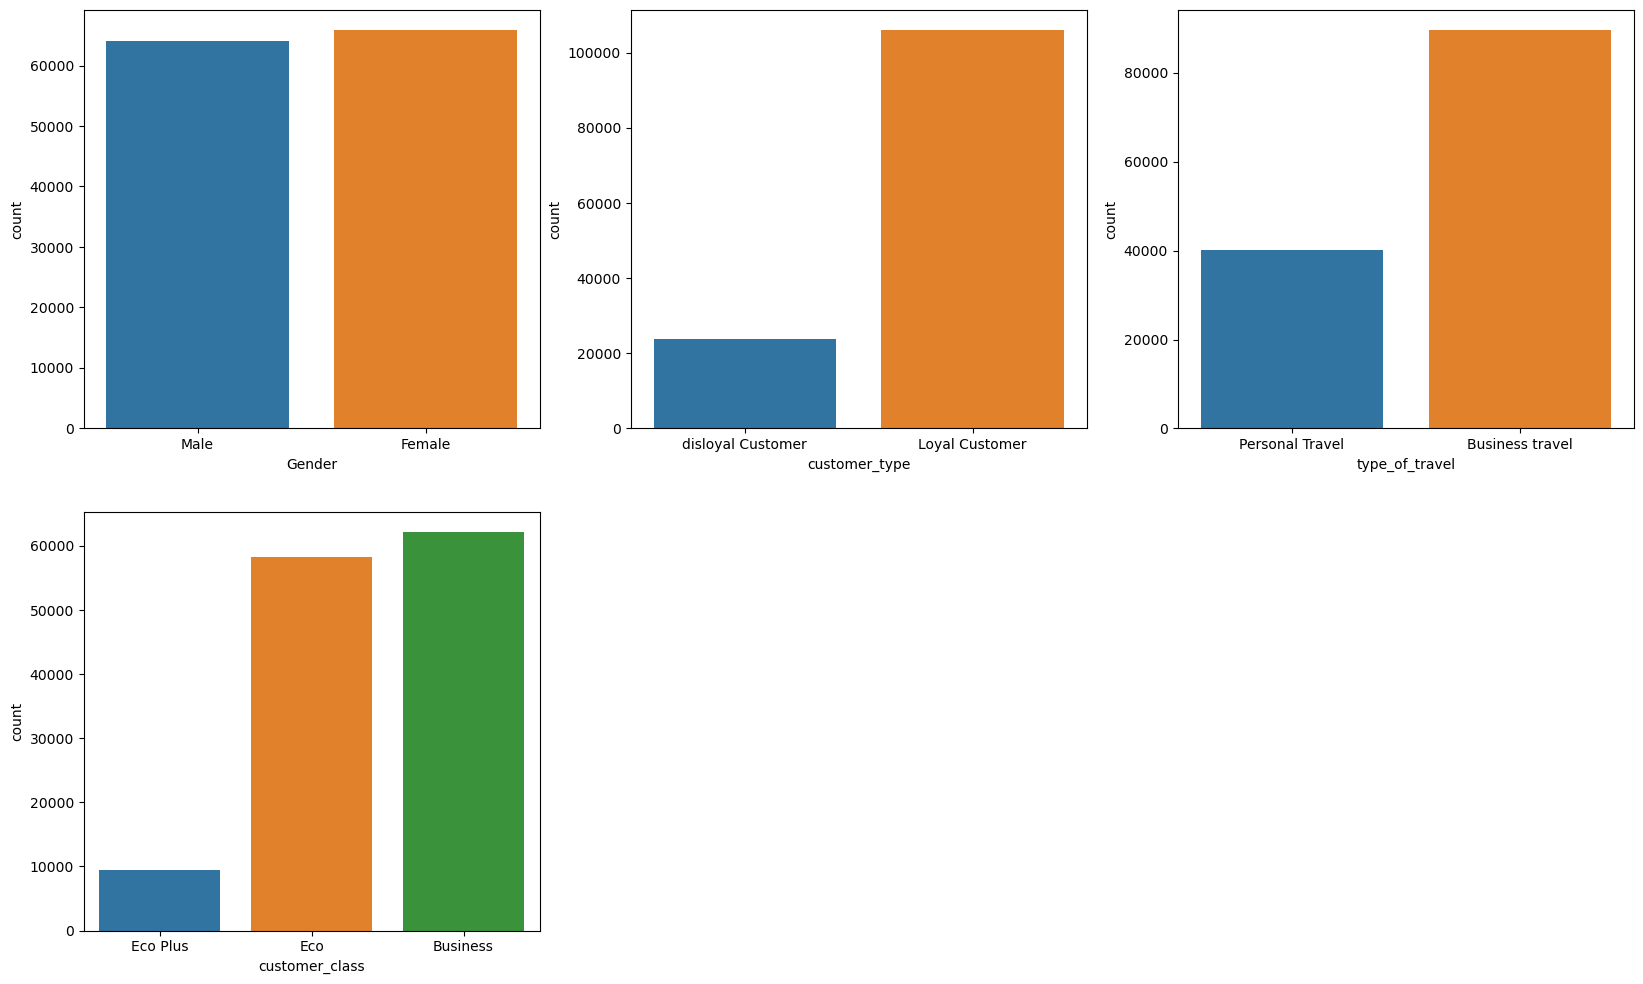

In [17]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.countplot(x=df['Gender'],order=df['Gender'].value_counts().index[::-1])

plt.subplot(432)
sns.countplot(x=df['customer_type'],order=df['customer_type'].value_counts().index[::-1])

plt.subplot(433)
sns.countplot(x=df["type_of_travel"],order=df["type_of_travel"].value_counts().index[::-1])

plt.subplot(434)
sns.countplot(x=df["customer_class"],order=df["customer_class"].value_counts().index[::-1])


<Axes: xlabel='customer_class'>

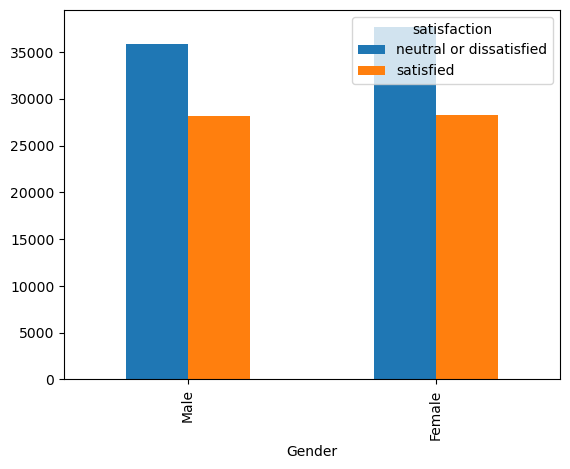

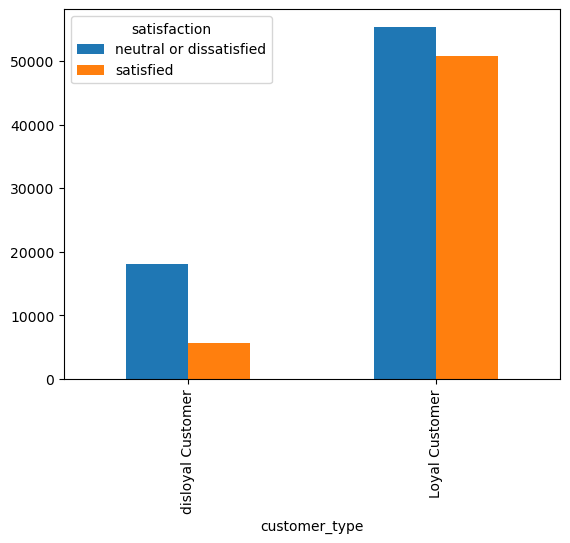

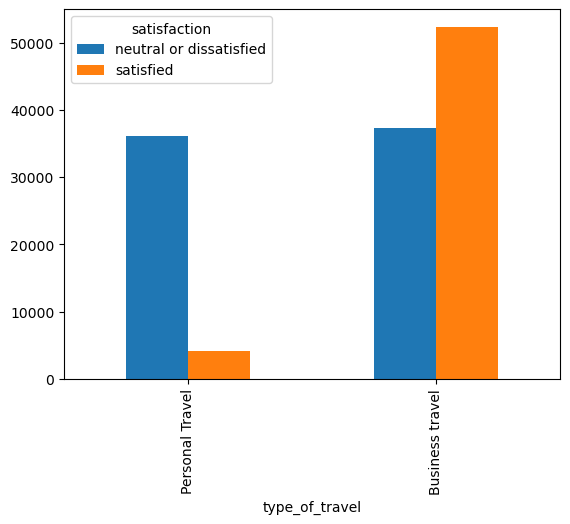

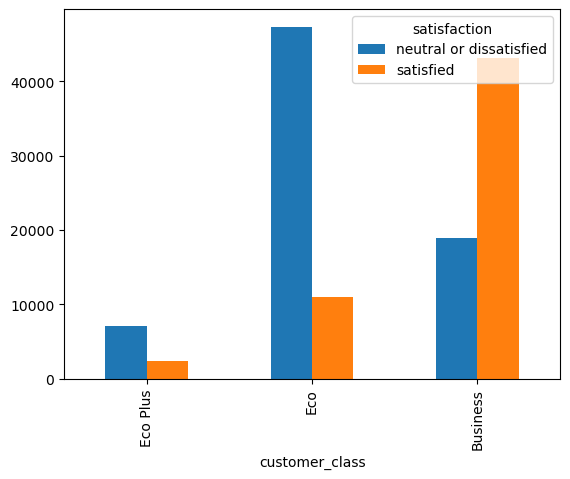

In [18]:
df.groupby(["Gender","satisfaction"]).size().unstack(fill_value=0).sort_values(by="satisfied").plot(kind="bar")
df.groupby(["customer_type","satisfaction"]).size().unstack(fill_value=0).sort_values(by="satisfied").plot(kind="bar")
df.groupby(["type_of_travel","satisfaction"]).size().unstack(fill_value=0).sort_values(by="satisfied").plot(kind="bar")
df.groupby(["customer_class","satisfaction"]).size().unstack(fill_value=0).sort_values(by="satisfied").plot(kind="bar")

In [19]:
int_dtypes,float_dtypes

(['age',
  'flight_distance',
  'inflight_wifi_service',
  'departure_arrival_time_convenient',
  'ease_of_online_booking',
  'gate_location',
  'food_and_drink',
  'online_boarding',
  'seat_comfort',
  'inflight_entertainment',
  'onboard_service',
  'leg_room_service',
  'baggage_handling',
  'checkin_service',
  'inflight_service',
  'cleanliness',
  'departure_delay_in_minutes'],
 ['arrival_delay_in_minutes'])

<Axes: xlabel='satisfaction', ylabel='seat_comfort'>

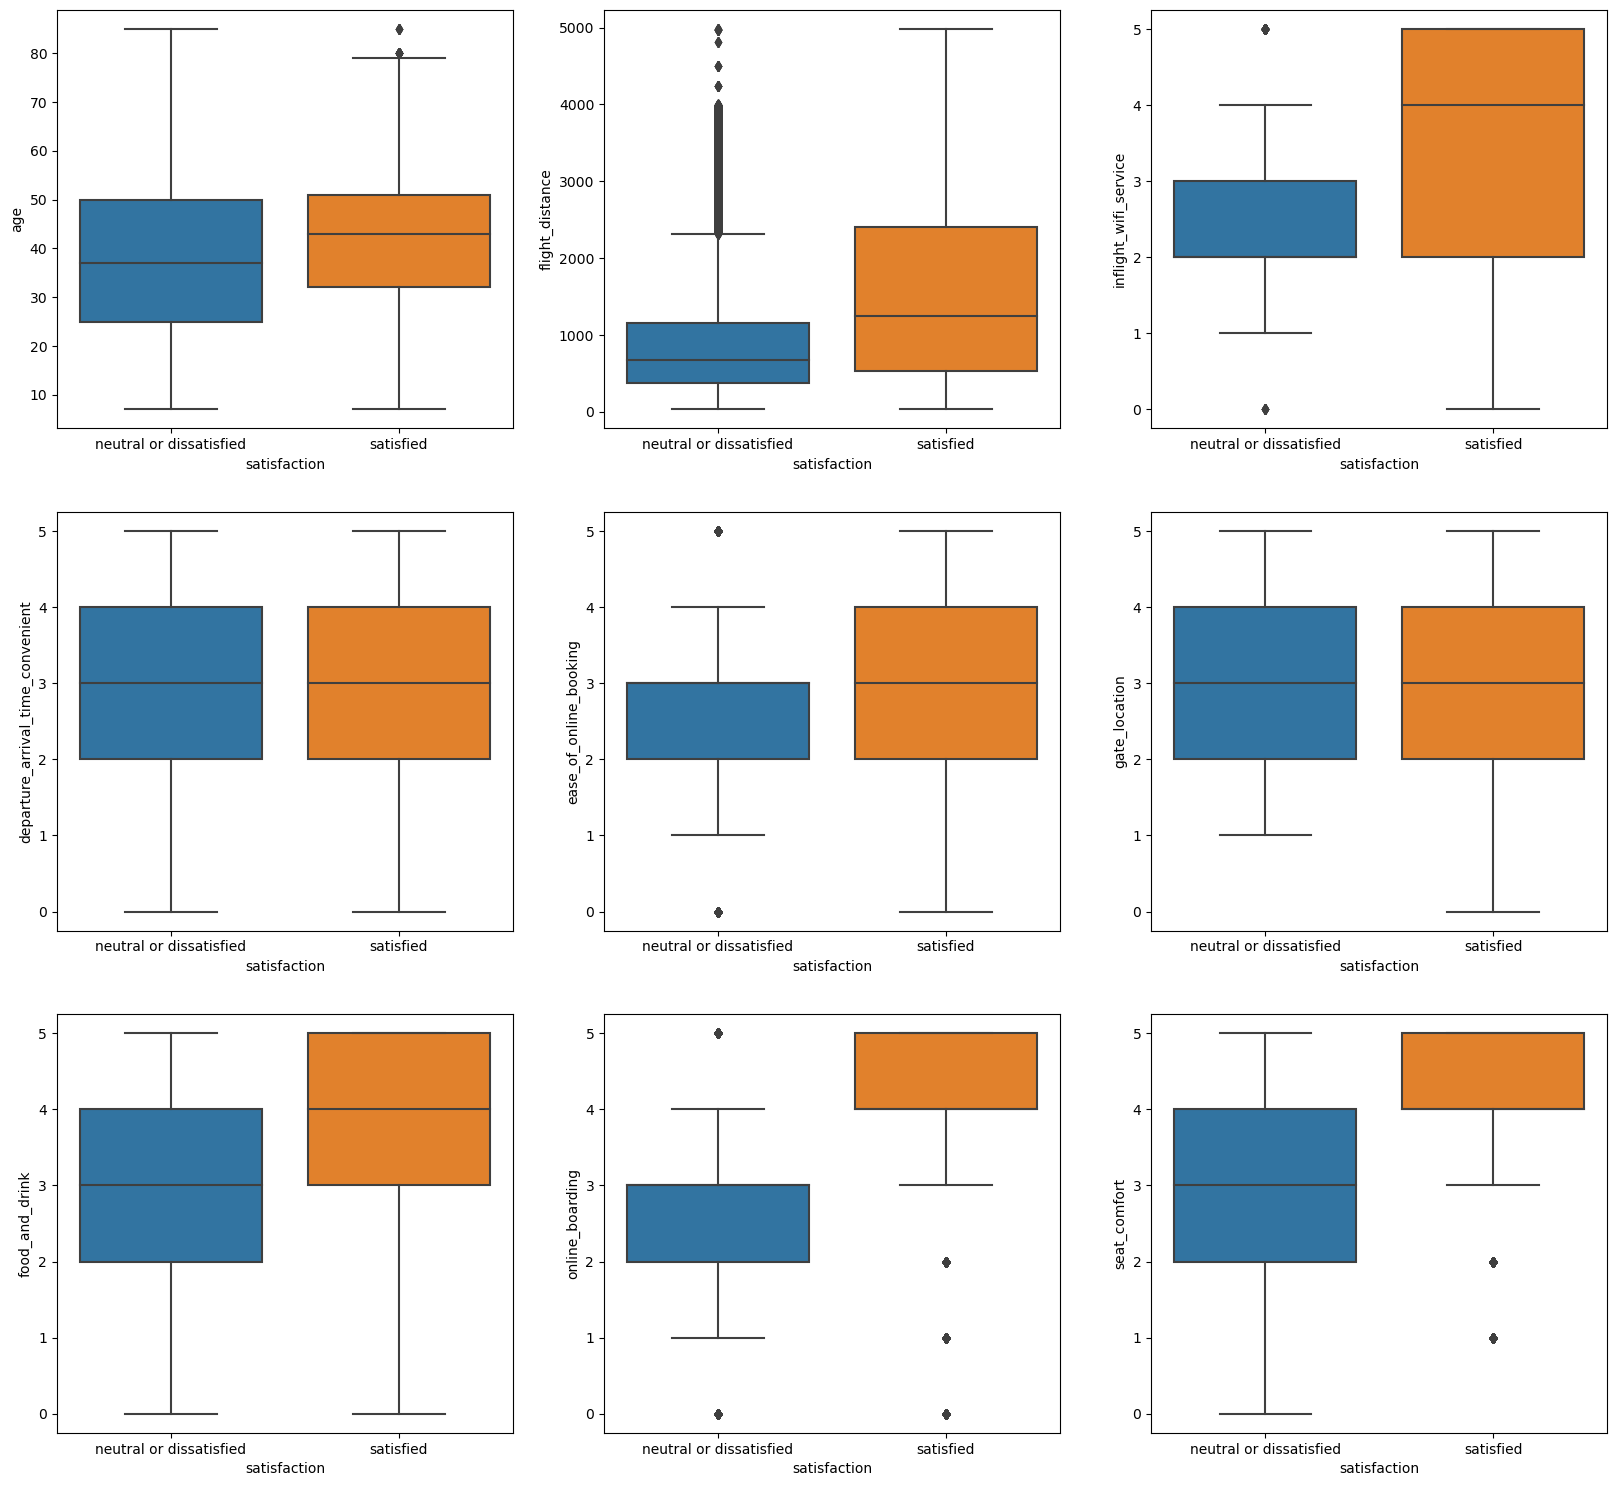

In [26]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.boxplot(x=df["satisfaction"],y=df['age'])

plt.subplot(432)
sns.boxplot(x=df["satisfaction"],y=df["flight_distance"])

plt.subplot(433)
sns.boxplot(x=df["satisfaction"],y=df["inflight_wifi_service"])

plt.subplot(434)
sns.boxplot(x=df["satisfaction"],y=df["departure_arrival_time_convenient"])

plt.subplot(435)
sns.boxplot(x=df["satisfaction"],y=df["ease_of_online_booking"])

plt.subplot(436)
sns.boxplot(x=df["satisfaction"],y=df["gate_location"])

plt.subplot(437)
sns.boxplot(x=df["satisfaction"],y=df["food_and_drink"])

plt.subplot(438)
sns.boxplot(x=df["satisfaction"],y=df["online_boarding"])

plt.subplot(439)
sns.boxplot(x=df["satisfaction"],y=df["seat_comfort"])

<Axes: xlabel='satisfaction', ylabel='arrival_delay_in_minutes'>

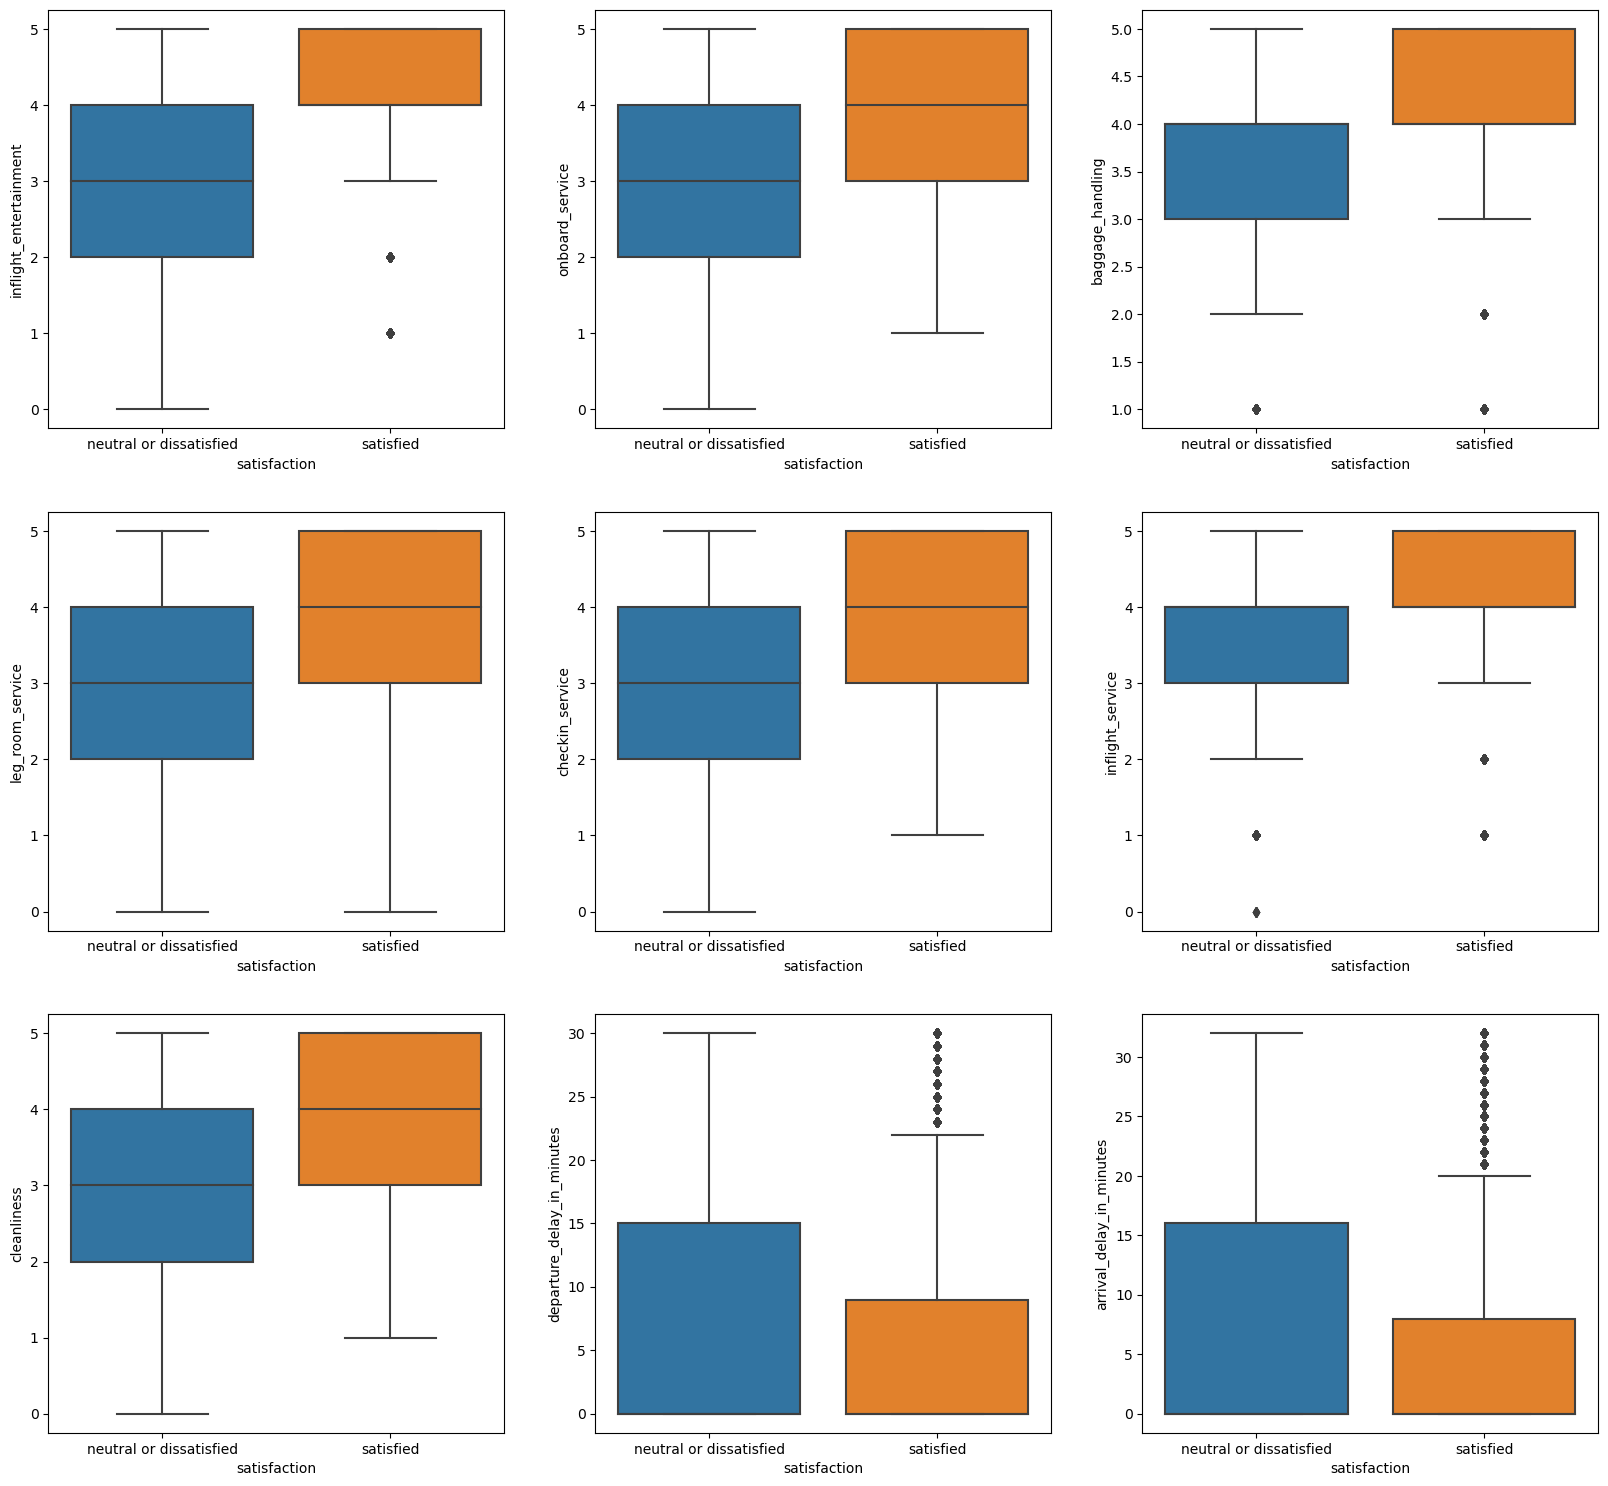

In [25]:
plt.figure(figsize=(20,25))

plt.subplot(431)
sns.boxplot(x=df["satisfaction"],y=df['inflight_entertainment'])

plt.subplot(432)
sns.boxplot(x=df["satisfaction"],y=df["onboard_service"])

plt.subplot(433)
sns.boxplot(x=df["satisfaction"],y=df["baggage_handling"])

plt.subplot(434)
sns.boxplot(x=df["satisfaction"],y=df["leg_room_service"])

plt.subplot(435)
sns.boxplot(x=df["satisfaction"],y=df["checkin_service"])

plt.subplot(436)
sns.boxplot(x=df["satisfaction"],y=df["inflight_service"])

plt.subplot(437)
sns.boxplot(x=df["satisfaction"],y=df["cleanliness"])

plt.subplot(438)
sns.boxplot(x=df["satisfaction"],y=df["departure_delay_in_minutes"])

plt.subplot(439)
sns.boxplot(x=df["satisfaction"],y=df["arrival_delay_in_minutes"])

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,129880.0,39.427957,15.119360,7.0,27.0,40.0,51.0,85.0
flight_distance,129880.0,1190.316392,997.452477,31.0,414.0,844.0,1744.0,4983.0
inflight_wifi_service,129880.0,2.728696,1.329340,0.0,2.0,3.0,4.0,5.0
departure_arrival_time_convenient,129880.0,3.057599,1.526741,0.0,2.0,3.0,4.0,5.0
ease_of_online_booking,129880.0,2.756876,1.401740,0.0,2.0,3.0,4.0,5.0
gate_location,129880.0,2.976925,1.278520,0.0,2.0,3.0,4.0,5.0
food_and_drink,129880.0,3.204774,1.329933,0.0,2.0,3.0,4.0,5.0
online_boarding,129880.0,3.252633,1.350719,0.0,2.0,3.0,4.0,5.0
seat_comfort,129880.0,3.441361,1.319289,0.0,2.0,4.0,5.0,5.0
inflight_entertainment,129880.0,3.358077,1.334049,0.0,2.0,4.0,4.0,5.0


In [23]:
q1=df['departure_delay_in_minutes'].quantile(.25)
q3=df['departure_delay_in_minutes'].quantile(.75)
iqr=q3-q1
lower=q1-(1.5*iqr)
upper=q3+(1.5*iqr)

In [24]:
df['age']=df['age'].clip(0,87)
df['arrival_delay_in_minutes']=df['arrival_delay_in_minutes'].clip(0,32)
df['departure_delay_in_minutes']=df["departure_delay_in_minutes"].clip(0,30)

In [27]:
del df['departure_arrival_time_convenient']
del df["gate_location"]

In [38]:
df["satisfaction"].unique()

array(['neutral or dissatisfied', 'satisfied'], dtype=object)

In [36]:
df["Gender"]=df['Gender'].map({"Male":0,"Female":1})
df["customer_type"]=df['customer_type'].map({"disloyal Customer":0,"Loyal Customer":1})
df["type_of_travel"]=df['type_of_travel'].map({"Personal Travel":0,"Business travel":1})
df["customer_class"]=df['customer_class'].map({"Eco Plus":0,"Eco":1,"Business":2})

In [39]:
df["satisfaction"]=df["satisfaction"].map({"neutral or dissatisfied":0,"satisfied":1})

In [40]:
df.head()

,Gender,customer_type,age,type_of_travel,customer_class,flight_distance,inflight_wifi_service,ease_of_online_booking,food_and_drink,online_boarding,...,inflight_entertainment,onboard_service,leg_room_service,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,satisfaction
0,0,1,13,0,0,460,3,3,5,3,...,5,4,3,4,4,5,5,25,18.0,0
1,0,0,25,1,2,235,3,3,1,3,...,1,1,5,3,1,4,1,1,6.0,0
2,1,1,26,1,2,1142,2,2,5,5,...,5,4,3,4,4,4,5,0,0.0,1
3,1,1,25,1,2,562,2,5,2,2,...,2,2,5,3,1,4,2,11,9.0,0
4,0,1,61,1,2,214,3,3,4,5,...,3,3,4,4,3,3,3,0,0.0,1


In [47]:
X=df.drop("satisfaction",axis=1)
y=df["satisfaction"]

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_scaled=sc.fit_transform(X_train)
X_test_scaled=sc.transform(X_test)

In [54]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
cross_val_score(lr,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.7613034544471857

In [55]:
from sklearn.neighbors import KNeighborsClassifier
k_value=np.arange(1,21)
for k in k_value:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled,y_train)
    print("k value",k,"train score",knn.score(X_train_scaled,y_train),"val score",np.mean(cross_val_score(knn,X_train_scaled,y_train,cv=10,scoring=make_scorer(roc_auc_score))))
    

k value 1 train score 1.0 val score 0.9097198486089011
k value 2 train score 0.9491728628624224 val score 0.8996993983245669
k value 3 train score 0.9578732016366757 val score 0.92085611272007
k value 4 train score 0.944256236526024 val score 0.9116796785176726
k value 5 train score 0.9486449029873729 val score 0.9219083912771074
k value 6 train score 0.9400875533459457 val score 0.9162954427994835
k value 7 train score 0.9436732808306568 val score 0.9224433710699198
k value 8 train score 0.9381077038145101 val score 0.917731910850183
k value 9 train score 0.9406045140569317 val score 0.9225373696218073
k value 10 train score 0.9368098024550134 val score 0.9188948000274128
k value 11 train score 0.9386466628536231 val score 0.9223449556166236
k value 12 train score 0.9353469136345638 val score 0.9187660869458177
k value 13 train score 0.9371067798847288 val score 0.9223329332307392
k value 14 train score 0.9340930089313212 val score 0.9190645541737273
k value 15 train score 0.935434906

In [56]:
from sklearn.tree import DecisionTreeClassifier
depth=np.arange(1,21)
for i in depth:
    dt=DecisionTreeClassifier(max_depth=i)
    dt.fit(X_train,y_train)
    print("depth",i,"train score",dt.score(X_train,y_train),"val score",np.mean(cross_val_score(dt,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score))))
    

depth 1 train score 0.7876501385894672 val score 0.7923243699291246
depth 2 train score 0.862235470104272 val score 0.8569405442550104
depth 3 train score 0.886356636895596 val score 0.8889738636210518
depth 4 train score 0.8896673852787188 val score 0.8812967998877254
depth 5 train score 0.9058471556161731 val score 0.9032884421840773
depth 6 train score 0.9185621892736152 val score 0.919569898657137
depth 7 train score 0.9288024110167628 val score 0.9239477336730035
depth 8 train score 0.937194773197237 val score 0.9333600345377248
depth 9 train score 0.9442012407057063 val score 0.9375747355394664
depth 10 train score 0.9512187073782392 val score 0.9424300492135377
depth 11 train score 0.9563443178318448 val score 0.9456181504645285
depth 12 train score 0.9611069558713538 val score 0.9477310685737566
depth 13 train score 0.9658365964186721 val score 0.9492084362455202
depth 14 train score 0.9699502837784328 val score 0.9494035886466072
depth 15 train score 0.9739869769897488 val sco

In [57]:
dt=DecisionTreeClassifier(max_depth=15)
dt.fit(X_train,y_train)
cross_val_score(dt,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9501876633491534

In [59]:
from sklearn.ensemble import RandomForestClassifier
depth=np.arange(1,26)
for depth in depth:
    rf=RandomForestClassifier(max_depth=depth,max_features="sqrt")
    rf.fit(X_train,y_train)
    print("depth",depth,"train score",rf.score(X_train,y_train),"val score",np.mean(cross_val_score(rf,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score))))

depth 1 train score 0.846165691407453 val score 0.8432242711408048
depth 2 train score 0.8678340446126095 val score 0.8667620841578954
depth 3 train score 0.8956069338730257 val score 0.8899850773597862
depth 4 train score 0.9083879625148489 val score 0.9083205889727693
depth 5 train score 0.924853711117955 val score 0.9227554456059357
depth 6 train score 0.9322781468608385 val score 0.9285190876206462
depth 7 train score 0.9353139161423731 val score 0.9324575231404181
depth 8 train score 0.9384156804082889 val score 0.9362767245215318
depth 9 train score 0.9425843635883673 val score 0.9394248464902726
depth 10 train score 0.9492938536671213 val score 0.9433739914236648
depth 11 train score 0.955728364644287 val score 0.9474327604787959
depth 12 train score 0.9602710194025255 val score 0.9506564428883004
depth 13 train score 0.9660785780280698 val score 0.9533499020292121
depth 14 train score 0.9723371023802191 val score 0.9553283731614982
depth 15 train score 0.9760108231774385 val sc

In [61]:
rf=RandomForestClassifier(max_depth=23,max_features="sqrt")
rf.fit(X_train,y_train)
cross_val_score(rf,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9591734188787067

In [64]:
import xgboost as xgb
for lr in [0.01,0.05,0.08,0.1,0.2,0.25,0.3]:
  xgb_regressor= xgb.XGBClassifier(learning_rate = lr,n_estimators=100)
  xgb_regressor.fit(X_train,y_train)
  print("Learning rate : ", lr,"cross_val_score:", cross_val_score(xgb_regressor,X_train,y_train,cv = 10,scoring=make_scorer(roc_auc_score)).mean())

Learning rate :  0.01 cross_val_score: 0.9352041878097452
Learning rate :  0.05 cross_val_score: 0.9497493602073319
Learning rate :  0.08 cross_val_score: 0.9554241455412628
Learning rate :  0.1 cross_val_score: 0.9574531448177765
Learning rate :  0.2 cross_val_score: 0.9601411616708534
Learning rate :  0.25 cross_val_score: 0.9598949787272198
Learning rate :  0.3 cross_val_score: 0.9600296005626063


In [76]:
xgb=xgb.XGBClassifier(learning_rate=0.2,n_estimators=100)
xgb.fit(X_train,y_train)
cross_val_score(xgb,X_train,y_train,cv=10,scoring=make_scorer(roc_auc_score)).mean()

0.9601411616708534

In [70]:
y_pred=rf.predict(X_test)

(array([0.5, 1.5]), [Text(0, 0.5, '0'), Text(0, 1.5, '1')])

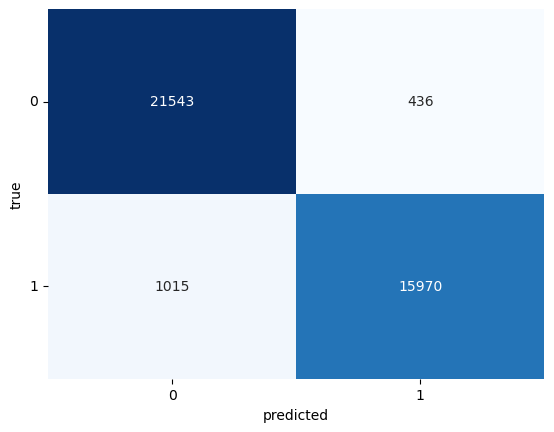

In [78]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm=confusion_matrix(y_test,y_pred,labels=rf.classes_)
sns.heatmap(cm,annot=True,fmt="d",cmap="Blues",cbar=False)
plt.xlabel("predicted")
plt.ylabel("true")
plt.yticks(rotation=0)

In [77]:
y_pred=xgb.predict(X_test)

In [79]:
xgb.feature_importances_

array([0.00187731, 0.05082991, 0.01009726, 0.13600017, 0.04747287,
       0.00294966, 0.0984211 , 0.01022699, 0.00330438, 0.43432343,
       0.02034847, 0.03592481, 0.02102286, 0.02550469, 0.01799065,
       0.0407051 , 0.01249077, 0.02021892, 0.00265333, 0.0076373 ],
      dtype=float32)

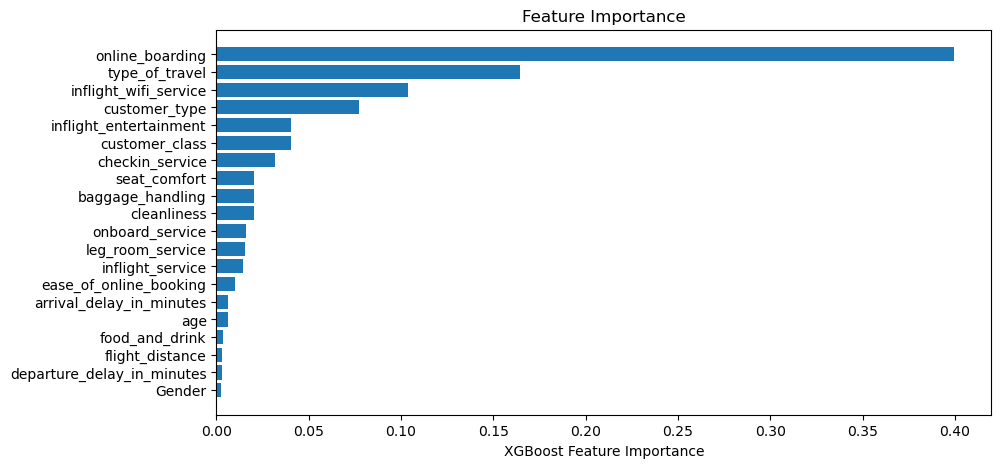

In [81]:
sorted_idx = xgb_regressor.feature_importances_.argsort()
plt.figure(figsize=(10,5))
plt.barh(df.columns[sorted_idx], xgb_regressor.feature_importances_[sorted_idx])
plt.xlabel("XGBoost Feature Importance")
plt.title("Feature Importance")
plt.show()